# 1 Dimensional Continuous Wavelet Transform and Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from scipy import signal

## Wavelet Function
A wavelet is a function $\psi \in L^2(\mathbb{R})$ and satisfies:

- $\int_{-\infty}^{\infty} \psi(t) \ \mathrm{d}t = 0.$
- $\|\psi\|=1$.

The Gaussian function:
$$g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$
The first derivative of Gaussian function:
$$g(x) = \frac{x-\mu}{\sigma^3\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}.$$

In [2]:
def gaus(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = 1/np.sqrt(scale) * 1 / (sigma * np.sqrt(2*np.pi)) * np.exp(-1/2 * ((-1*t/scale)/sigma)**2)
#     g = g / np.sqrt(np.sum(g*g))
    return g, t

def gaus1(N, sigma, scale):
    t = np.linspace(-5,5,N)
    g = -1 * 1/np.sqrt(scale) * 1/(sigma**3*np.sqrt(2*np.pi)) * (-1*t/scale) * np.exp(-1/2 * (-1*(t/scale)/sigma)**2)
    return g, t

In [3]:
g0, t0 = gaus(128,1,1)
g1, t1 = gaus1(128,1,1)

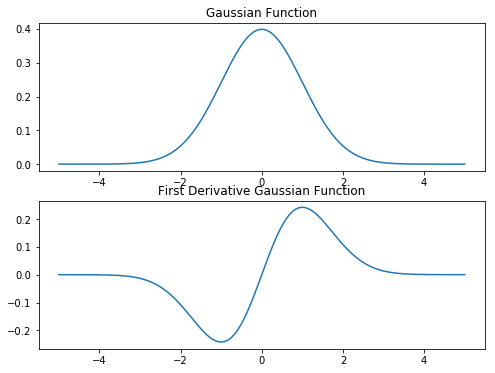

In [4]:
p1 = plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
plt.plot(t0,g0)
plt.title('Gaussian Function')
plt.subplot(2,1,2)
plt.plot(t1,g1)
plt.title('First Derivative Gaussian Function')

# Test Signal

In [5]:
N = 256; t = np.linspace(0,N-1,N);

In [6]:
sig1 = np.zeros(N); sig1[0:127] = 1
sig2 = np.zeros(N)
sig2[20:40] = 1; sig2[40:50] = 2
sig2[80:130] = -2/625 * (t[80:130]-105)**2 + 2;
sig2[150] = 2;
sig2[180:225] = 2/45**2 * (t[180:225]-225)**2

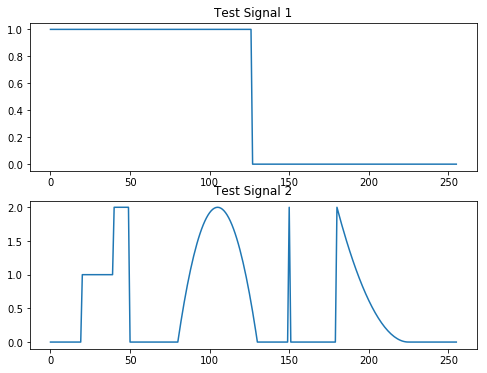

In [7]:
p2 = plt.figure(figsize=[8,6])
plt.subplot(2,1,1)
plt.plot(t,sig1)
plt.title('Test Signal 1')
plt.subplot(2,1,2)
plt.plot(t,sig2)
plt.title('Test Signal 2')

## Continuous Wavelet Transform
Suppose $\psi$ is a real wavelet, then the wavelet transform can be defined:
$$Wf(u,s) = \int_{-\infty}^{+\infty} f(t)\frac{1}{\sqrt{s}}\psi(\frac{t-u}{s}) \ \mathrm{d}t.$$
Let
$$\bar{\psi}_s(t) = \frac{1}{\sqrt{s}}\psi(\frac{-t}{s}),$$
then
$$Wf(u,s) = f * \bar{\psi}_s(t),$$
$*$ is the convolution product.

In [8]:
def cwt_1d(sig, scale):
    C = np.zeros([len(scale), len(sig)])
    for i in range(len(scale)):
        wavelet, t = gaus1(len(sig),1,scale[i])
        C[i,:] = signal.fftconvolve(sig, wavelet, 'same')
    return C

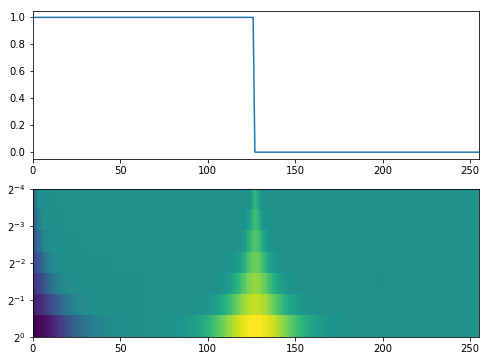

In [9]:
scale = np.linspace(-4, 0, 8);
scale = 2**scale
# scale = np.linspace(1/2**4, 1, 8);

C1 = cwt_1d(sig1, scale)
C2 = cwt_1d(sig2, scale)
p3, (ax0, ax1) = plt.subplots(nrows=2, figsize=[8,6])

ax0.plot(t,sig1)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C1)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

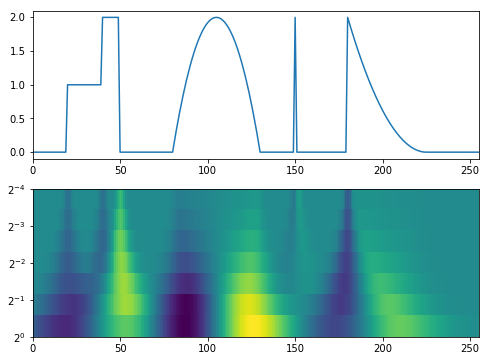

In [10]:
p4, (ax0, ax1) = plt.subplots(nrows=2, figsize=[8,6])

ax0.plot(t,sig2)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C2)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

## Wavelet Transform Modulus Maxima
Find wavelet transform local modulus maxima in each scale.

In [11]:
def wtmm_1d(C):
    nrow = C.shape[0]; ncol = C.shape[1]
    MM = np.zeros([nrow, ncol])
    for i in range(nrow):
        left = np.zeros(ncol)
        right = np.zeros(ncol)
        left[0:ncol-2] = C[i,1:ncol-1]
        right[1:ncol-1] = C[i,0:ncol-2]
        ind = np.where((C[i,:]-left) * (C[i,:]-right) >= 0)
        MM[i,ind] = np.abs(C[i,ind])
    return MM

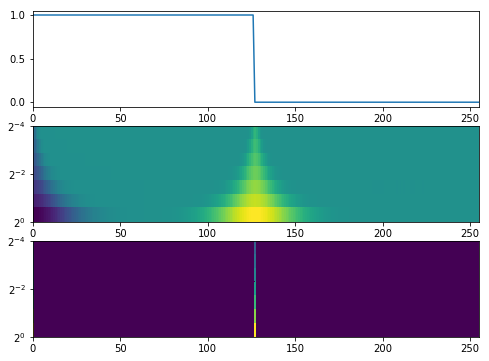

In [12]:
MM1 = wtmm_1d(C1)

p5, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=[8,6])

ax0.plot(t,sig1)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C1)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

ax2.pcolor(t, scale, MM1)
ax2.set_yscale("log", nonposx='clip', basey=2)
ax2.invert_yaxis()

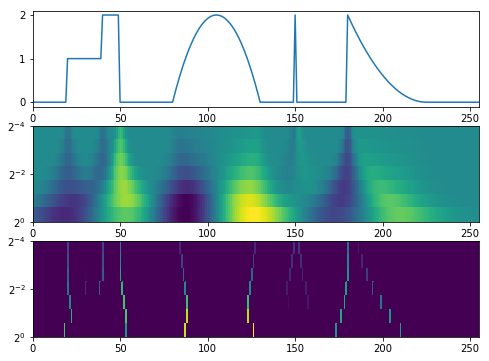

In [13]:
MM2 = wtmm_1d(C2)

p6, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=[8,6])

ax0.plot(t,sig2)
ax0.autoscale(enable=True, axis='x', tight=True)

ax1.pcolor(t, scale, C2)
ax1.set_yscale("log", nonposx='clip', basey=2)
ax1.invert_yaxis()

ax2.pcolor(t, scale, MM2)
ax2.set_yscale("log", nonposx='clip', basey=2)
ax2.invert_yaxis()

## Local Lipschitz Regularity

In [14]:
C = MM2
nrow = C.shape[0]; ncol = C.shape[1]
# ind = np.where(np.abs(C[0,:]) > 1e-6 * np.max(abs(C[0,:])) )

# ind1 = np.where(np.abs(C[1,:]) > 1e-6 * np.max(abs(C[1,:])))[0]
# L = C[1,ind1]
# ind2 = np.where(np.abs(C[2,:]) > 1e-6 * np.max(abs(C[2,:])))[0]
# LL = np.zeros(len(ind1))
# for i in range(len(ind1)):
#     index = ind1[i]
#     if ind1[i] == ind2[i]:
#         LL[i] = C[2,ind2[i]]
#     elif ind1[i] == ind2[i] - 1:
#         LL[i] = C[2,ind2[i]]
#     elif ind1[i] == ind2[i] + 1:
#         LL[i] = C[2,ind2[i]]
#     else:
#         LL[i] = 0

        
ind = np.where(np.abs(C[0,:]) > 1e-6 * np.max(abs(C[0,:])))[0]
L = np.zeros([10, len(ind)])
for j in range(10):
    ind1 = np.where(np.abs(C[j,:]) > 1e-6 * np.max(abs(C[j,:])))[0]
    for i in range(len(ind)):
        if ind[i] == ind1[i]:
            L[j,i] = C[j,ind1[i]]
        elif ind[i] == ind1[i]+1:
            L[j,i] = C[j,ind1[i]]
        elif ind[i] == ind1[i]-1:
            L[j,i] = C[j,ind1[i]]
        else:
            L[j,i] = 0


IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
# plt.pcolor(L)
plt.plot(L[7,:])

In [ ]:
plt.plot(L[2,:])

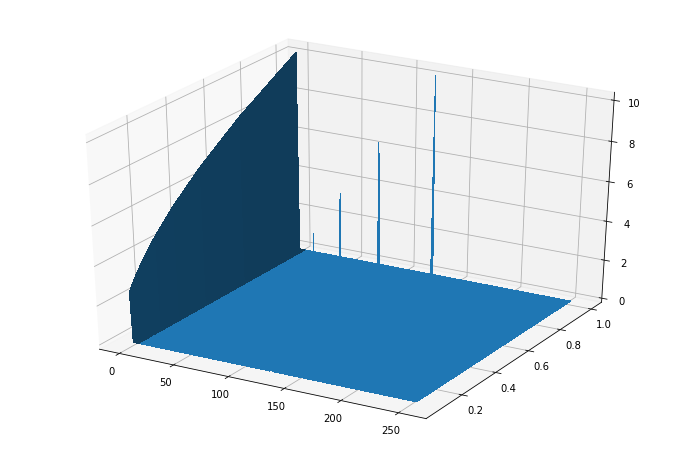

In [15]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection='3d')
S, T = np.meshgrid(t, scale)
ax.plot_surface(S, T, MM1,
                       linewidth=0, antialiased=False)

In [ ]:
plt.plot(MM1[:,30])

In [ ]:
T.shape

In [ ]:
MM2.shape